In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
url='https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

In [4]:
#reading the above file

df = pd.read_csv(url, sep = '\t')

In [30]:
#print 1st 5 records

df.head(5)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [6]:
#print last 7 records

df.tail(7)

,order_id,quantity,item_name,choice_description,item_price
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",$8.75
4616,1832,1,Chips and Guacamole,NaN,$4.45
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


In [7]:
#print total records or types of variables

df.shape[0]

4622

In [8]:
#more informative way

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
order_id              4622 non-null int64
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    3376 non-null object
item_price            4622 non-null object
dtypes: int64(2), object(3)
memory usage: 180.6+ KB


In [9]:
#name of all the columns

df.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [10]:
#How is the dataset indexed?

df.index

RangeIndex(start=0, stop=4622, step=1)

In [37]:
#Which was the most ordered item? and How many items were ordered?

most_ordered_item= df.groupby('item_name')
most_ordered_item= most_ordered_item.sum()
most_ordered_item= most_ordered_item.sort_values(by='quantity' , ascending=False)
most_ordered_item.head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


In [39]:
#What was the most ordered item in the choice_description column?

most_ordered_choice = df.groupby('choice_description')
most_ordered_choice = most_ordered_choice.sum()
most_ordered_choice = most_ordered_choice.sort_values(by='quantity' , ascending=False)
most_ordered_choice.head(1)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


In [55]:
#Turn the item price into a float

df.astype({"item_price":float})
df.head(5)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [62]:
#How much was the revenue for the period in the dataset?

revenue = (df['quantity']* df['item_price']).sum()
print('Revenue was: $' + str(np.round(revenue,2)))

Revenue was: $39237.02


# print a data frame with only two columns item_name and item_price

In [63]:
# delete the duplicates in item_name and quantity
filtered = df.drop_duplicates(['item_name','quantity'])

# select only the products with quantity equals to 1
one_prod = filtered[filtered.quantity == 1]

# select only the item_name and item_price columns
price_per_item = one_prod[['item_name', 'item_price']]

# sort the values from the most to less expensive
price_per_item.sort_values(by = "item_price", ascending = False)

,item_name,item_price
606,Steak Salad Bowl,11.89
1229,Barbacoa Salad Bowl,11.89
1132,Carnitas Salad Bowl,11.89
7,Steak Burrito,11.75
168,Barbacoa Crispy Tacos,11.75
39,Barbacoa Bowl,11.75
738,Veggie Soft Tacos,11.25
186,Veggie Salad Bowl,11.25
62,Veggie Bowl,11.25
57,Veggie Burrito,11.25


In [64]:
#What was the quantity of the most expensive item ordered?

df.sort_values(by = "item_price", ascending = False).head(1)

,order_id,quantity,item_name,choice_description,item_price
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25


In [67]:
#How many times were a Veggie Salad Bowl ordered?

df[df.item_name == "Veggie Salad Bowl"].sum()

order_id                                                          17303
quantity                                                             18
item_name             Veggie Salad BowlVeggie Salad BowlVeggie Salad...
choice_description    [Fresh Tomato Salsa, [Fajita Vegetables, Rice,...
item_price                                                        182.5
dtype: object

# Visualizing

# 1. What are the most popular items?

In [70]:
top5 = df['item_name'].value_counts().sort_values().tail()

Text(0, 0.5, 'Orders')

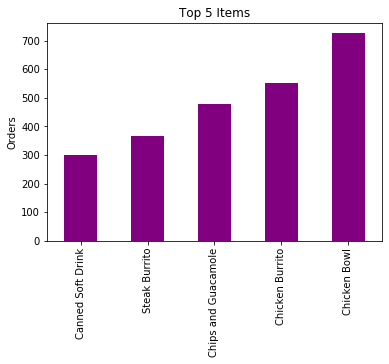

In [82]:
top5.plot(kind='bar', color='purple')
plt.title('Top 5 Items')
plt.ylabel('Orders')

# 2. What's the distribution of order prices?

Text(0.5, 0, 'Price')

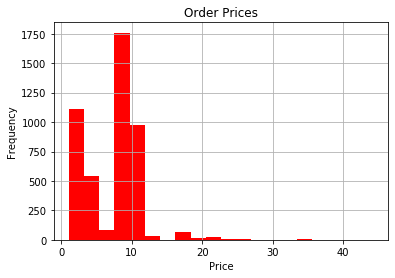

In [90]:
df['item_price'].hist(bins=20, color='red')
plt.title('Order Prices')
plt.ylabel('Frequency')
plt.xlabel('Price')

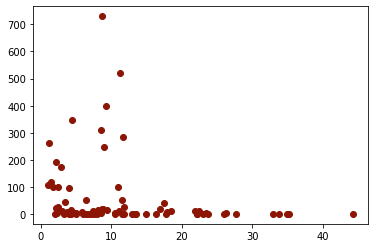

In [92]:
#scatterplot

prices = df['item_price'].value_counts().sort_index()
plt.scatter(prices.index, prices, color='#8C1505')

# 3. Revenue

Text(0.5, 0, 'Price')

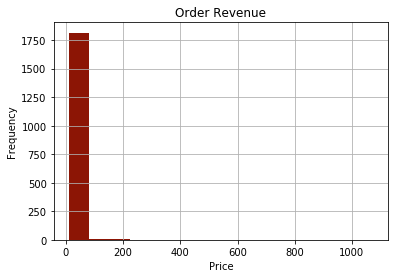

In [96]:
df['revenue'] = df['quantity'] * df['item_price']



df.groupby('order_id').agg({'revenue': np.sum}).hist(bins=15, color='#8C1505')
plt.title('Order Revenue')
plt.ylabel('Frequency')
plt.xlabel('Price')